In [164]:
import pickle
import pandas as pd
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.decomposition import PCA
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [165]:
df = pd.read_csv('./AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [166]:
df.drop(['name','id','host_name','last_review'], axis=1, inplace=True)
df.dropna()
df = df.drop(df[df['price'] == 0].index)


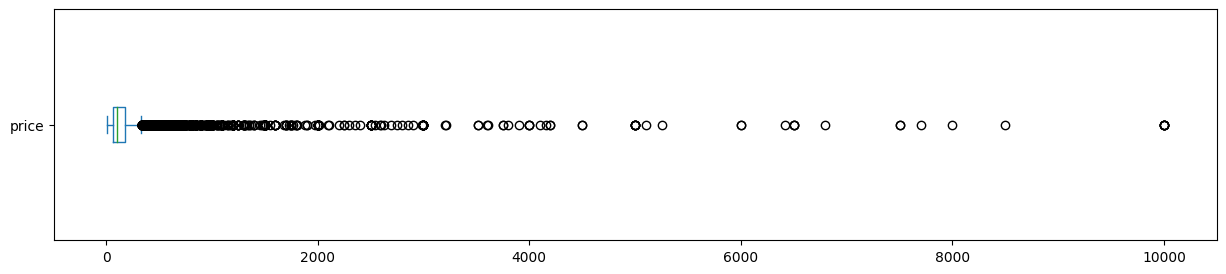

Values over $1000.00: 
239
0.4889%


Values equal to $0: 
0
0.0000%


In [167]:

# Displaying the box plot
df['price'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Calculating the number and the percentage of prices that are equal to  500.00
print('Values over $1000.00: ')
print(len(df[df['price'] > 1000]))
print('{:.4f}%'.format((len(df[df['price'] > 1000]) / df.shape[0]) * 100))
print('\n')
print('Values equal to $0: ')
print(len(df[df['price'] == 0]))
print('{:.4f}%'.format((len(df[df['price'] == 0]) / df.shape[0]) * 100))

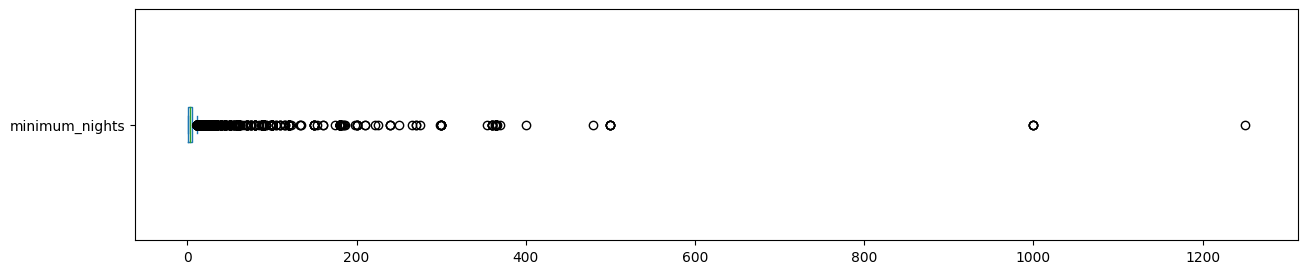

Values over 30 nights: 
747
1.5281%


In [168]:
# Displaying the box plot
df['minimum_nights'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Calculating the number and the percentage of rooms with the minimum nights value over 30
print('Values over 30 nights: ')
print(len(df[df['minimum_nights'] > 30]))
print('{:.4f}%'.format((len(df[df['minimum_nights'] > 30]) / df.shape[0]) * 100))

In [169]:
#summarize of null cells:
df.isnull().sum()

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10051
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [170]:

# Selecting the rows that fulfil the established requirements
df = df[(df['price'] <= 1000) & (df['price'] > 0) & (df['minimum_nights'] <= 30)].copy()
df.reset_index()

,index,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47919,48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
47920,48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
47921,48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
47922,48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


In [171]:
dataset = df[['price', 'room_type', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews']]


# display the modified dataframe
print(dataset)

       price        room_type neighbourhood_group       neighbourhood  \
0        149     Private room            Brooklyn          Kensington   
1        225  Entire home/apt           Manhattan             Midtown   
2        150     Private room           Manhattan              Harlem   
3         89  Entire home/apt            Brooklyn        Clinton Hill   
4         80  Entire home/apt           Manhattan         East Harlem   
...      ...              ...                 ...                 ...   
48890     70     Private room            Brooklyn  Bedford-Stuyvesant   
48891     40     Private room            Brooklyn            Bushwick   
48892    115  Entire home/apt           Manhattan              Harlem   
48893     55      Shared room           Manhattan      Hell's Kitchen   
48894     90     Private room           Manhattan      Hell's Kitchen   

       latitude  longitude  minimum_nights  number_of_reviews  
0      40.64749  -73.97237               1                 

In [172]:
y = dataset['price']
X = dataset.drop(['price'], axis=1)
features = [col for col in X]
X

,room_type,neighbourhood_group,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews
0,Private room,Brooklyn,Kensington,40.64749,-73.97237,1,9
1,Entire home/apt,Manhattan,Midtown,40.75362,-73.98377,1,45
2,Private room,Manhattan,Harlem,40.80902,-73.94190,3,0
3,Entire home/apt,Brooklyn,Clinton Hill,40.68514,-73.95976,1,270
4,Entire home/apt,Manhattan,East Harlem,40.79851,-73.94399,10,9
...,...,...,...,...,...,...,...
48890,Private room,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,2,0
48891,Private room,Brooklyn,Bushwick,40.70184,-73.93317,4,0
48892,Entire home/apt,Manhattan,Harlem,40.81475,-73.94867,10,0
48893,Shared room,Manhattan,Hell's Kitchen,40.75751,-73.99112,1,0


In [173]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error


num_features = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews']



cat_features = ['neighbourhood_group', 'neighbourhood', 'room_type']

encoder = LabelEncoder()

X_cat = df[cat_features]

for feature in cat_features:
    encoder.fit(df[feature])
    X_cat[feature] = encoder.transform(df[feature])


X = pd.concat([pd.DataFrame(X_cat), df[num_features]], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)


y_pred = dt.predict(X_test)


print("R^2 score:", r2_score(y_test, y_pred))
print("Mean squared error:", mean_squared_error(y_test, y_pred))


R^2 score: 0.3309758454765287
Mean squared error: 9033.969143160666


C:\Users\panaham\AppData\Local\Temp\ipykernel_14568\4171832501.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat[feature] = encoder.transform(df[feature])
C:\Users\panaham\AppData\Local\Temp\ipykernel_14568\4171832501.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat[feature] = encoder.transform(df[feature])
C:\Users\panaham\AppData\Local\Temp\ipykernel_14568\4171832501.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [174]:
from sklearn.ensemble import RandomForestRegressor



rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R^2 score:", r2)

R^2 score: 0.34840716478059885


In [175]:
X_test

,neighbourhood_group,neighbourhood,room_type,latitude,longitude,minimum_nights,number_of_reviews
7546,2,103,0,40.85991,-73.93193,3,34
29667,2,34,0,40.73686,-73.99171,1,0
23511,1,28,0,40.69441,-73.90881,3,12
27505,1,13,1,40.68640,-73.91858,10,6
27429,2,202,2,40.78481,-73.97648,1,73
...,...,...,...,...,...,...,...
19911,3,189,1,40.74674,-73.92194,1,122
1389,1,214,0,40.72091,-73.96133,3,25
22433,1,74,1,40.65026,-73.96308,2,0
25408,2,137,0,40.74819,-73.97201,6,2


In [176]:

X = dataset.drop(['price'], axis=1)
y = dataset['price']


X = pd.get_dummies(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R^2 score:", r2)


R^2 score: 0.34505777672085314
